In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Fish.csv")
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [3]:
df.drop(df[df['Weight']==0.0].index, inplace=True)
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
Species = preprocessing.LabelEncoder()
df['Species_n'] = Species.fit_transform(df['Species'])
X = df.drop('Species',axis='columns')
X = X.drop('Species_n',axis='columns')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_n
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [5]:
#sns.pairplot(df, hue='Species', palette='viridis')

# Linear regression

## 1 - create a linear regression model using LinearRegression from Scikit-learn

## 2 - plot the test set and the prediction of your model to compare them

## 3 - display the performance indicators of your model : R2

In [6]:
X = np.array(df['Length1']).reshape(-1, 1) 
y = np.array(df['Length2']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)


0.999194230739045

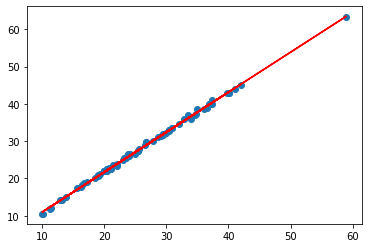

In [8]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')
plt.show()

In [9]:
X = np.array(df['Length1']).reshape(-1, 1) 
y = np.array(df['Length3']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9821150594757228

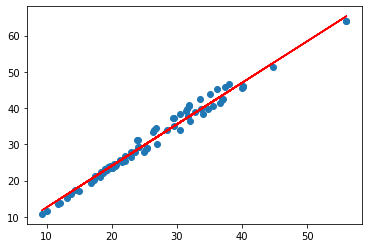

In [10]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')
plt.show()

In [11]:
X = np.array(df['Height']).reshape(-1, 1) 
y = np.array(df['Width']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6102834286423737

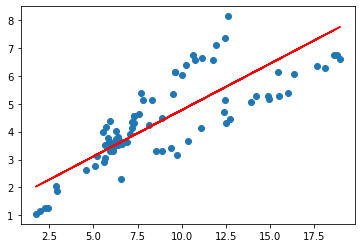

In [12]:
y_predict = lr.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color='red')
plt.show()

In [13]:
X = df.drop(['Weight','Species'], axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.861647911743791

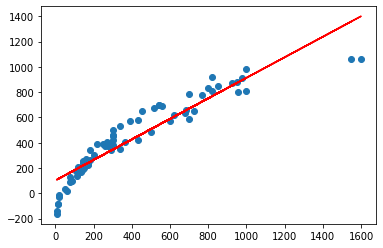

In [14]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

In [17]:
X = df.drop(['Length1', 'Species'], axis=1)
y = df['Length1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9992998829714304

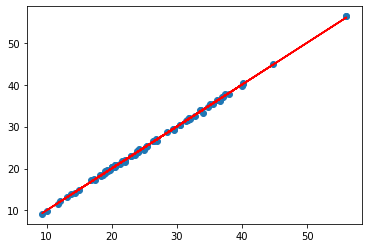

In [18]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

In [20]:
X = df.drop(['Length3', 'Species'], axis=1)
y = df['Length3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9971368862227308

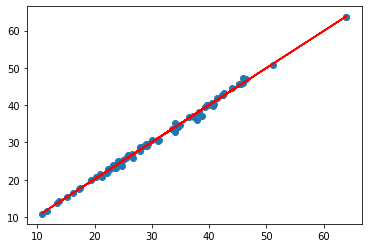

In [21]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

In [23]:
X = df.drop(['Height', 'Species'], axis=1)
y = df['Height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9471602100827482

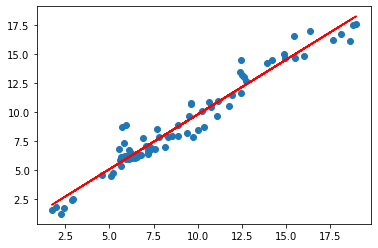

In [24]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

In [25]:
X = df.drop(['Width', 'Species'], axis=1)
y = df['Width']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8940147782831201

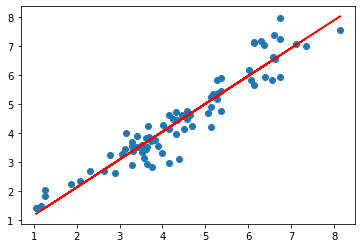

In [26]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

In [28]:
X = df.drop(['Species_n','Species'], axis=1)
y = df['Species_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6298515642238321

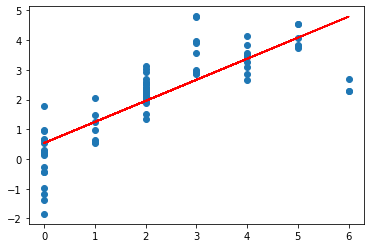

In [29]:
# Plot outputs
y_predict = lr.predict(X_test)

slope, intercept, r, p, std_err = stats.linregress(y_test, y_predict)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, y_test))
plt.scatter(y_test, y_predict)
plt.plot(y_test, mymodel,color='red')
plt.show()

# Support vector regressor


## 0 - when using SVM you must use Standard Scalard before

## 1 - create a LinearSVR model from Scikit-learn

## 2 - plot the test set and the prediction of your model to compare them

## 3 - display the performance indicators of your model : R2

In [31]:
scaled_features = df.copy()
col_names = ['Weight', 'Length1','Length2','Length3','Height','Width']
features = df[col_names]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features
df = scaled_features
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_n
0,Bream,-0.445495,-0.309933,-0.286587,-0.110466,0.591654,-0.240092,0
1,Bream,-0.310877,-0.229770,-0.202457,-0.006935,0.815870,-0.070461,0
2,Bream,-0.170649,-0.239791,-0.183761,-0.015562,0.792000,0.161475,0
3,Bream,-0.106145,0.000698,0.049934,0.191499,0.874260,0.018572,0
4,Bream,0.081760,0.020738,0.049934,0.234637,0.807462,0.421564,0
...,...,...,...,...,...,...,...,...
154,Smelt,-1.089979,-1.482314,-1.520498,-1.542642,-1.610713,-1.800030,5
155,Smelt,-1.086614,-1.462273,-1.501803,-1.534015,-1.531396,-1.874035,5
156,Smelt,-1.089979,-1.422192,-1.445716,-1.508132,-1.567130,-1.881876,5
157,Smelt,-1.068945,-1.311968,-1.324194,-1.387346,-1.427976,-1.399948,5


In [64]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width,Species_n
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,158.000000
mean,4.497106e-17,5.227886e-16,4.159823e-16,2.866905e-16,-1.798842e-16,-2.473408e-16,2.253165
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.704011
min,-1.107648e+00,-1.883127e+00,-1.875715e+00,-1.939510e+00,-1.695261e+00,-2.005535e+00,0.000000
25%,-7.841438e-01,-7.157571e-01,-6.978910e-01,-6.971403e-01,-7.114644e-01,-6.091395e-01,1.000000
50%,-3.347154e-01,-9.950584e-02,-9.963110e-02,-1.363484e-01,-2.797544e-01,-8.741787e-02,2.000000
75%,6.987596e-01,6.419998e-01,6.809111e-01,7.242516e-01,7.906106e-01,6.904725e-01,3.000000
max,3.503305e+00,3.277351e+00,3.265581e+00,3.168011e+00,2.328630e+00,2.208152e+00,6.000000


In [32]:
X = df.drop(['Weight','Species'], axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.8121024727548819


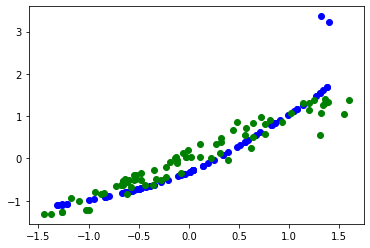

In [33]:
plt.figure()
y_predict = lsvr.predict(X_test)
poly = np.polyfit(y_test, y_predict,5)
poly_y = np.poly1d(poly)(y_test)
plt.plot(poly_y,y_test,'bo')
plt.plot(y_predict,poly_y,'go')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (158,) and (79,)

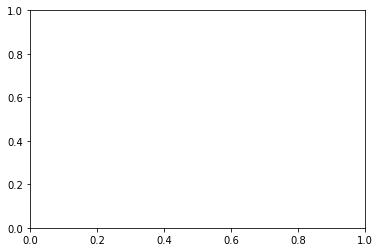

In [34]:
X1 = y
y1 = y_test
plt.plot(X1, y1,'bo')
#plt.plot(X1, lsvr.predict(X1), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [113]:
X = df.drop(['Length1','Species'], axis=1)
y = df['Length1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.9990840086852524


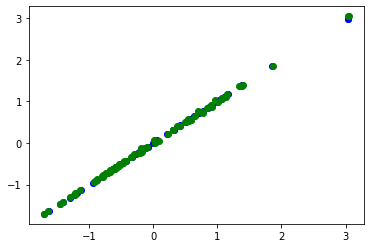

In [114]:
plt.figure()
y_predict = lsvr.predict(X_test)
poly = np.polyfit(y_test, y_predict,5)
poly_y = np.poly1d(poly)(y_test)
plt.plot(poly_y,y_test,'bo')
plt.plot(y_predict,poly_y,'go')
plt.show()

In [35]:
X = df.drop(['Length3','Species'], axis=1)
y = df['Length3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.9964047845841352


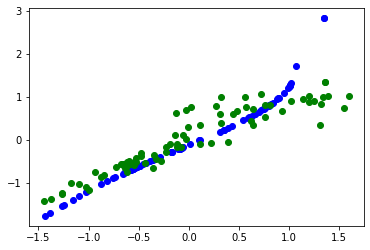

In [36]:
plt.figure()
y_pred = lsvr.predict(X_test)
poly = np.polyfit(y_test, y_predict,5)
poly_y = np.poly1d(poly)(y_test)
plt.plot(poly_y,y_test, 'bo')
plt.plot(y_predict,poly_y,'go')
plt.show()

In [38]:
X = df.drop(['Height','Species'], axis=1)
y = df['Height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.9346233412270216


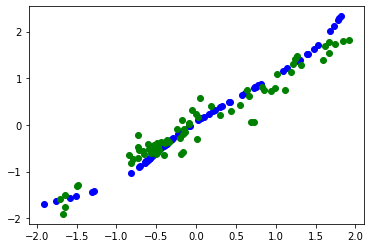

In [39]:
plt.figure()
y_predict = lsvr.predict(X_test)
poly = np.polyfit(y_test, y_predict,5)
poly_y = np.poly1d(poly)(y_test)
plt.plot(poly_y,y_test,'bo')
plt.plot(y_predict,poly_y,'go')
plt.show()

In [40]:
X = df.drop(['Width','Species'], axis=1)
y = df['Width']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.8620011129967236


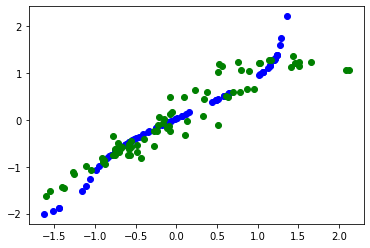

In [41]:
plt.figure()
y_predict = lsvr.predict(X_test)
poly = np.polyfit(y_test, y_predict,5)
poly_y = np.poly1d(poly)(y_test)
plt.plot(poly_y,y_test,'bo')
plt.plot(y_predict,poly_y,'go')
plt.show()

In [121]:
X = df.drop(['Species_n','Species'], axis=1)
y = df['Species_n']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 
lsvr = LinearSVR(verbose=0, dual=True,max_iter=100000)
lsvr.fit(X_train, np.ravel(y_train))
score = lsvr.score(X_test, np.ravel(y_test))
print("R-squared:", score)

R-squared: 0.5268808390099433


## 4 - try differents values of the hyper-parameter C to tune your model.

In [42]:
d_range = range(1, 10)
scores = []
X = df.drop(['Length1','Species'], axis=1)
y = df['Length1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=4) 

for k in d_range:
    lsvrC = LinearSVR(verbose=0, dual=True,max_iter=1000000,C=k)
    lsvrC.fit(X_train, np.ravel(y_train))
    y_pred = lsvrC.predict(X_test)
    scores.append(r2_score(y_test, np.ravel(y_pred)))

Text(0, 0.5, 'Testing Accuracy')

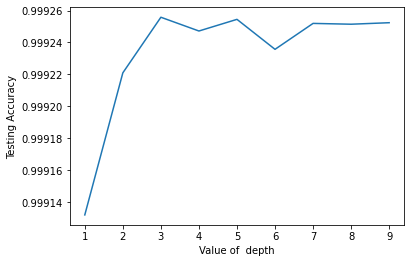

In [123]:
plt.plot(d_range, scores)
plt.xlabel('Value of  depth')
plt.ylabel('Testing Accuracy')

# DECISION TREES REGRESSOR

# 1 - create a DecisionTreeRegressor model from Scikit-learn

## 2 - plot the test set and the prediction of your model to compare them

## 3 - display the performance indicators of your model : R2

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [44]:
X = df.drop(['Weight','Species'], axis=1)
y = df['Weight']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9366914277065101


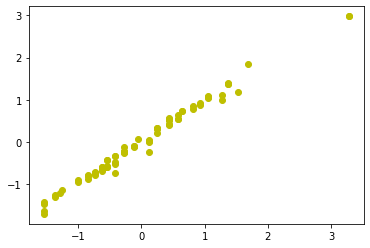

In [48]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

In [51]:
X = df.drop(['Length1','Species'], axis=1)
y = df['Length1']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9856719187741504


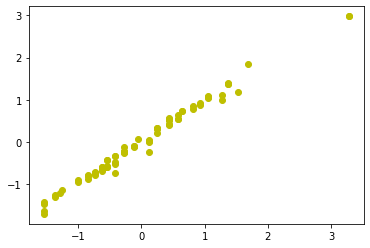

In [52]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

In [53]:
X = df.drop(['Length3','Species'], axis=1)
y = df['Length3']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9813338074575835


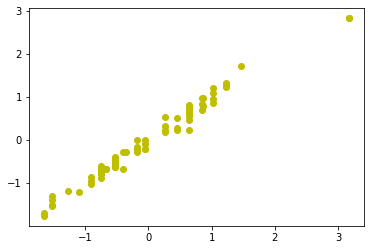

In [54]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

In [55]:
X = df.drop(['Height','Species'], axis=1)
y = df['Height']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9516964120075325


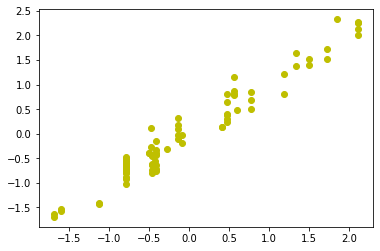

In [56]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

In [57]:
X = df.drop(['Width','Species'], axis=1)
y = df['Width']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.9164193905511678


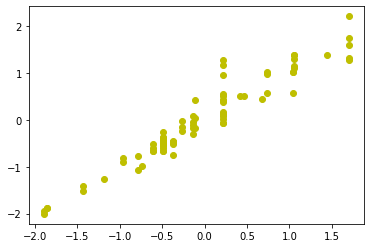

In [58]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

In [59]:
X = df.drop(['Species_n','Species'], axis=1)
y = df['Species_n']

regressor = DecisionTreeRegressor(random_state=1,max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=101)
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.49110054624387545


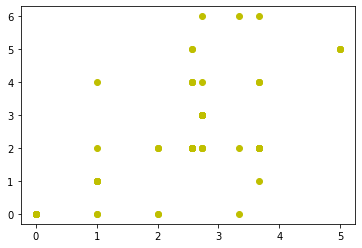

In [138]:
y_predict = regressor.predict(X_test)
plt.plot(y_predict,y_test, 'yo')
plt.show()

## 4 - try differents values of the hyper-parameter max_depth to get better score. Which value is best ?

In [62]:
d_range = range(1, 1000)
scores = []
X = df.drop(['Length1','Species'], axis=1)
y = df['Length1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=101) 

for k in d_range:
    regressor = DecisionTreeRegressor(random_state=1,
                                        max_depth=5,
                                        max_features=None, 
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, 
                                        min_samples_split=2,)
    regressor.fit(X_train, np.ravel(y_train))
    y_pred = regressor.predict(X_test)
    scores.append(r2_score(y_test, np.ravel(y_pred)))

Text(0, 0.5, 'Testing Accuracy')

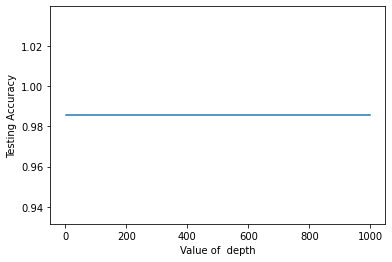

In [63]:
plt.plot(d_range, scores)
plt.xlabel('Value of  depth')
plt.ylabel('Testing Accuracy')